In [ ]:
cdf["author"].unique()

array(['albert camus', 'albert einstein', 'aldous huxley',
       'aleksandr solzhenitsyn', 'aristotle', 'arthur schopenhauer',
       'elon musk', 'ayn rand', 'carl jung', 'charles bukowski',
       'confucius', 'diogenes', 'epictetus', 'franz kafka',
       'friedrich nietzsche', 'fyodor dostoevsky', 'galileo galilei',
       'henry david thoreau', 'hunter s. thompson', 'jean-paul sartre',
       'jiddu krishnamurti', 'john locke', 'lao tzu', 'marcus aurelius',
       'milton friedman', 'miyamoto musashi', 'niccolo machiavelli',
       'plato', 'rabindranath tagore', 'robert frost', 'rumi', 'seneca',
       'socrates', 'soren kierkegaard', 'sun tzu', 'viktor e. frankl',
       'voltaire', 'zhuangzi', 'pythagoras', 'heraclitus', 'democritus',
       'nagarjuna', 'oprah winfrey', 'donald trump', 'steve jobs'],
      dtype=object)

# Embeddings to Insights

In [ ]:
# Read in Data & Apply Prelim Transformations
import pandas as pd
import numpy as np 


# Function to Map String Saved to np.ndarrays
def stringToArray(df, col):
    converted_strings = []
    for se in df[col]:
        # Basic Cleaning of Text Data
        se = se.replace("\n", '').strip("[").strip("]") #basic cleaning of odd vals
        se = se.split()
        
        # Do Conversion
        se = np.array([se])
        se = se.astype(np.float) #numerical! 
        converted_strings.append(se)

    # ReWrite Column
    df[col] = converted_strings
    return df


# Read in Data w Embeddings Saved
df = pd.read_csv("../Data/Quotes+Embeddings.csv", engine="python") #after using BERT 
df = stringToArray(df, "embedding")
df["author"] = df["author"].str.lower() #Team Added Author Strings not LowerCase

df

,quote,author,embedding
0,age is an issue of mind over matter. if you do...,mark twain,"[[0.115264028, 0.212118551, 0.156775028, -0.25..."
1,"anyone who stops learning is old, whether at t...",henry ford,"[[-0.0289038979, 0.213069841, 0.207753137, -0...."
2,wrinkles should merely indicate where smiles h...,mark twain,"[[0.0432917289, -0.227921709, 0.0757735446, -0..."
3,true terror is to wake up one morning and disc...,kurt vonnegut,"[[0.12796618, -0.12819007, -0.0782715604, -0.0..."
4,a diplomat is a man who always remembers a wom...,robert frost,"[[-0.487012148, 0.141420722, 0.00562851038, -0..."
...,...,...,...
61137,talent is extremely important. it's like a spo...,elon musk,"[[-0.106960192, -0.0146146137, 0.214442819, 0...."
61138,if you get up in the morning and think the fut...,elon musk,"[[0.0870407745, -0.324076205, 0.0251149721, -0..."
61139,people should�pursue what they're passionate a...,elon musk,"[[0.148150012, -0.106315762, 0.343888849, 0.51..."
61140,"i wouldn't say i have a lack of fear. in fact,...",elon musk,"[[0.030401215, 0.127313003, -0.104103282, 0.07..."


## Visualize Doc Vecs with T-SNE

Insights
- when scaling down the embeddings they sit in different quadrants for each author -- need normalize or view all at same time? 

/Users/ckg-files/miniconda3/envs/nlp/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/ckg-files/miniconda3/envs/nlp/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


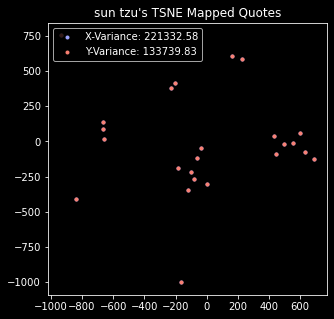

In [ ]:
# Map Vectors to TSNE Values & Plot -- Author Specific
import matplotlib.pyplot as plt 
from sklearn.manifold import TSNE


# Examine Projection of Single Author Quote Corpus
AUTHOR = "sun tzu"
author_subset = cdf[cdf["author"]==AUTHOR] #or use df
#author_subset = df[df["author"]==AUTHOR] #or use df

author_subset.reset_index(inplace=True)
author_subset = author_subset["embedding"]
embeddings_stack = np.vstack(author_subset) #kickass function 


# Get TSNE Mapping
tsne = TSNE(random_state=42
          , n_components=2 #dims to map into (X, y) if two!
          , learning_rate=1e2 #learning rate gets multiplied (changed since og implementation)
          , perplexity=1 #used as a nearest neighbor in calculation (keep <3 since few quotes in data)
          , metric="cosine" #Distance Metrics supported (reference metrics section, cosine fits our purposes nicely)- https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html
           
           )

tsne_embedded = tsne.fit_transform(embeddings_stack)


# Plot TSNE Values
Xs, ys = [], []
for i in tsne_embedded:
    Xs.append(i[0]) #vals unscaled!
    ys.append(i[1]) #vals unscaled!

X1, y1 = Xs, ys
# Scale Vals -- maybe use?
#Xs = np.log(Xs)
#ys = np.log(ys)

# Calculate Variance for both axes
x_var = np.var(Xs)
y_var = np.var(ys)

# Plotting Params
#plt.style.use('dark_background') #dark mode
plt.style.use('seaborn-pastel') #light mode

plt.figure(figsize=(5, 5), dpi=None) #size & DPI-(can specify w int)
plt.title("{}'s TSNE Mapped Quotes".format(AUTHOR)) #old-school AuthorName in Title str formatting

plt.plot(Xs, ys, ".", color="#9FA5FF", label='X-Variance: {:.2f}'.format(x_var))
plt.plot(X1, y1, ".", color="salmon", label='Y-Variance: {:.2f}'.format(y_var))
# plt.plot(X_avg, y_avg, ".", color="royalblue", label='Average')
# plt.plot(X_avg1, y_avg1, ".", color="gold", label='Average')


plt.legend(loc="best")
#plt.legend("{variance}".format(variance = np.var(Xs)), loc="best")
#plt.legend("Sun Lao".format(), loc="best")




In [ ]:
a = cdf[cdf["author"]=="albert einstein"]

a = a["era"].unique()
a = a.tolist()
a[0]

'Late Modern'

[Function to Get TSNE reduced Embeddings]()

/Users/ckg-files/miniconda3/envs/nlp/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/ckg-files/miniconda3/envs/nlp/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


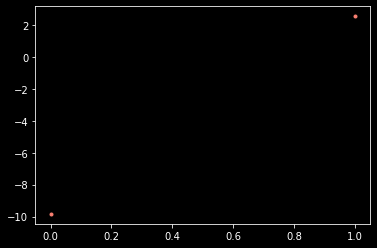

In [ ]:
# Given a Subset of author quotes, get TSNE Reduced Embeddings!
import matplotlib.pyplot as plt 
from sklearn.manifold import TSNE

def authorEmbedToTSNE(df, AUTHOR, tsne, author_dist=False):
    # SubSet df for Author 
    author_subset = df[df["author"]==AUTHOR]
    author_subset.reset_index(inplace=True)
    
    era = author_subset["era"].unique()
    era = era.tolist()
    era = era[0] #first string in era list

    hemi = author_subset["hemisphere"].unique()
    hemi = hemi.tolist()
    hemi = hemi[0] #first string in era list

    author_subset = author_subset["embedding"]
    embeddings_stack = np.vstack(author_subset) #kickass function 
    
    # Using instantiated TSNE, reduce dims 
    tsne_embedded = tsne.fit_transform(embeddings_stack)
    #tsne_embedded = np.mean(tsne_embedded, axis=1) #get average embeddings
    #print(tsne_embedded.shape)
    #print(author_subset[0].shape)

    if author_dist==True:
        return tsne_embedded, era, hemi #return TSNE's for 1 author distribution 
    elif author_dist==False:
        return np.mean(tsne_embedded, axis=0), era, hemi #aggregate author dist into 1 tsne!

# Test 
a, e, h = authorEmbedToTSNE(df=cdf, AUTHOR="elon musk", tsne=tsne)
plt.plot(a, ".", color="salmon", label='Y-Variance: {:.2f}'.format(y_var))
#plt.plot([i for i in a], ".", color="salmon", label='Y-Variance: {:.2f}'.format(y_var)) #unpacks the arrays



In [ ]:
# Testing Averaging of Embeddings as Approximation (Average Sentiment? Not really elegant)

X_avg = np.average(Xs)
y_avg = np.average(ys)

X_avg1 = np.average(X1)
y_avg1 = np.average(y1)


Using the averaging method above is not the most elegant way of capturing the "semantics" associated with each author, but as we can see from the graph, it is a reasonable approximation? 

- These are the averages of the embeddings after the T-SNE dimensionality reduction! 


## Compute Most Similar & Dissimilar Authors per Notable

- Elon Musk
- Steve Jobs
- Donald Trump
- Oprah Winfrey
- Albert Einstein

In [ ]:
# Experiment with Quote Level Cosine Similarity
from scipy.spatial.distance import cosine

v1 = author_subset[0]
v2 = author_subset[10]

dif = cosine(v1, v2) #returns distance between (not similarity!)
sim = 1 - cosine(v1, v2) 

# Format Old Way - no f-strings in version of python
print('Similarity: {:.2f} | Difference: {:.2f}'.format(sim, dif))



Similarity: 0.81 | Difference: 0.19


In [ ]:
cdf

In [ ]:
# Similar & Dissimilar Funcs

def notableCosineComparison(notable, df, most_similar=True):
    max_similarity = {"author":None, "similarity":0}
    max_distance = {"author":None, "similarity":0}

    # SubSet df for Author
    dfa = df[df["author"]==notable] #for average embedding vector
    df_na = df[df["author"]!=notable] #for computing later
    dfa.reset_index(inplace=True)
    
    author_subset = dfa["embedding"]
    embeddings_stack = np.vstack(author_subset) #kickass function
    notable_avg_embedding = np.mean(embeddings_stack, axis=0) #average for 768 embedding

    # Return Similarity or Difference
    if most_similar:
        # Get Rid of Outliers & Notables for Similarity Comparison (Notables are related to each other!)
        df_na = df_na[df_na["author"]!="oprah winfrey"] #outlier that is really far away
        df_na = df_na[df_na["author"]!="albert einstein"]
        df_na = df_na[df_na["author"]!="steve jobs"]
        df_na = df_na[df_na["author"]!="donald trump"]
        df_na = df_na[df_na["author"]!="elon musk"]
        df_na = df_na[df_na["author"]!="robert frost"]
        

        for author in df_na["author"].unique():
            current_df = df_na[df_na["author"]==author]
            author_subset = current_df["embedding"]
            embeddings_stack = np.vstack(author_subset) #kickass function
            author_avg_embedding = np.mean(embeddings_stack, axis=0)

            distance = cosine(notable_avg_embedding, author_avg_embedding)
            similarity = 1 - distance

            # Update Most Similar
            if similarity > max_similarity["similarity"]:
                max_similarity["similarity"] = similarity
                max_similarity["author"] = author
                
        return max_similarity

    elif most_similar == False:
        # Get Rid of Outliers for Notables
        df_na = df_na[df_na["author"]!="nagarjuna"] #outlier that is really far away
        df_na = df_na[df_na["author"]!="miyamoto musashi"]

        for author in df_na["author"].unique():
            current_df = df_na[df_na["author"]==author]
            author_subset = current_df["embedding"]
            embeddings_stack = np.vstack(author_subset) #kickass function
            author_avg_embedding = np.mean(embeddings_stack, axis=0)

            distance = cosine(notable_avg_embedding, author_avg_embedding)

            # Update Most Different
            if distance > max_distance["similarity"]:
                max_distance["similarity"] = distance
                max_distance["author"] = author

        return max_distance


# Most Distant
ms = False

print(" albert einstein-", notableCosineComparison("albert einstein", cdf, most_similar=ms), "\n" 
,     "  oprah winfrey-", notableCosineComparison("oprah winfrey", cdf, most_similar=ms), "\n" 
,     "      elon musk-", notableCosineComparison("elon musk", cdf, most_similar=ms), "\n" 
,     "   donald trump-", notableCosineComparison("donald trump", cdf, most_similar=ms), "\n"
,     "     steve jobs-", notableCosineComparison("steve jobs", cdf, most_similar=ms))
                                #most similar controls for either distance or similarity in embeddings space

 albert einstein- {'author': 'seneca', 'similarity': 0.06919569309480733} 
   oprah winfrey- {'author': 'diogenes', 'similarity': 0.0872653796755335} 
       elon musk- {'author': 'diogenes', 'similarity': 0.10618454169437264} 
    donald trump- {'author': 'seneca', 'similarity': 0.10566991459549346} 
      steve jobs- {'author': 'seneca', 'similarity': 0.1041482995408266}


In [ ]:
# Most Similar 
ms = True

print(" albert einstein-", notableCosineComparison("albert einstein", cdf, most_similar=ms), "\n" 
,     "  oprah winfrey-", notableCosineComparison("oprah winfrey", cdf, most_similar=ms), "\n" 
,     "      elon musk-", notableCosineComparison("elon musk", cdf, most_similar=ms), "\n" 
,     "   donald trump-", notableCosineComparison("donald trump", cdf, most_similar=ms), "\n"
,     "     steve jobs-", notableCosineComparison("steve jobs", cdf, most_similar=ms))

 albert einstein- {'author': 'aldous huxley', 'similarity': 0.992345135368029} 
   oprah winfrey- {'author': 'jean-paul sartre', 'similarity': 0.9696480658818686} 
       elon musk- {'author': 'hunter s. thompson', 'similarity': 0.950540168194184} 
    donald trump- {'author': 'hunter s. thompson', 'similarity': 0.9705583979095049} 
      steve jobs- {'author': 'hunter s. thompson', 'similarity': 0.9636746341131129}


[14.201911  -3.4893997]


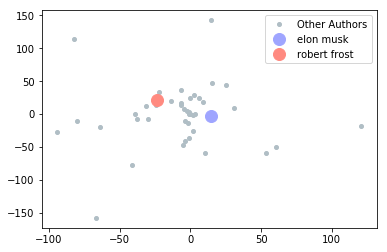

In [ ]:
# Plot Two Authors -- Above Similarity Func not working! 

def vizAuthors(a1, a2, EA):
    X_all, y_all = [], []
    # Split out a1 & a2 from rest of EA Vals
    for i in range(0, len(EA["tsne"])):
        row = EA["tsne"][i]
        author_name = EA["author"][i]
        
        if author_name == a1:
            X_a1 = row[0]
            y_a1 = row[1]
            print(row)
        if author_name == a2:
            X_a2 = row[0]
            y_a2 = row[1]
        else:
            X_all.append(row[0])
            y_all.append(row[1])

    plt.plot(X_all, y_all, ".", color="#B0BEC5", label='Other Authors', markersize=8)
    plt.plot(X_a1, y_a1, ".", color="#9FA5FF", label='{}'.format(a1), markersize=24)
    plt.plot(X_a2, y_a2, ".", color="#FF8A80", label='{}'.format(a2), markersize=24)
    plt.legend(loc="best", fontsize=10)

vizAuthors("elon musk", "robert frost", EA=EA)


## Plot All Authors in TSNE Embedding Space 

- read in data that was joined (embeddings to our labeled set of individuals)
- Produce different plots examining authors against one another 

In [ ]:
# Read in Manually Labeled Set & Make Sure Embeddings are Converted to "ndarrays"

cdf = pd.read_csv("../Data/LabeledAuthors+Embeddings.csv") #fixed the mispellings
cdf = stringToArray(cdf, "embedding") #CKG func to get saved embeddings into ndarrays



In [ ]:
# Produce Plot of All Authors with Average Semantic Vec

EA = {"tsne":[],   #embedding aggregation
      "era":[], 
      "author":[],
      "hemi":[]
     }


for author in cdf["author"].unique():

    # Get Embeddings & Labels for Each Author in Labeled set 
    embeddings, era, hemi = authorEmbedToTSNE(df=cdf, AUTHOR=author, tsne=tsne, author_dist=False) #author_dist true returns tsnes for AUTHORS QUOTE DISTRIBUTION, not aggregated values!
    
    # Append Relevant info for plotting 
    EA["tsne"].append(embeddings)
    EA["era"].append(era)
    EA["author"].append(author)
    EA["hemi"].append(hemi)

EA

{'author': ['albert camus',
  'albert einstein',
  'aldous huxley',
  'aleksandr solzhenitsyn',
  'aristotle',
  'arthur schopenhauer',
  'elon musk',
  'ayn rand',
  'carl jung',
  'charles bukowski',
  'confucius',
  'diogenes',
  'epictetus',
  'franz kafka',
  'friedrich nietzsche',
  'fyodor dostoevsky',
  'galileo galilei',
  'henry david thoreau',
  'hunter s. thompson',
  'jean-paul sartre',
  'jiddu krishnamurti',
  'john locke',
  'lao tzu',
  'marcus aurelius',
  'milton friedman',
  'miyamoto musashi',
  'niccolo machiavelli',
  'plato',
  'rabindranath tagore',
  'robert frost',
  'rumi',
  'seneca',
  'socrates',
  'soren kierkegaard',
  'sun tzu',
  'viktor e. frankl',
  'voltaire',
  'zhuangzi',
  'pythagoras',
  'heraclitus',
  'democritus',
  'nagarjuna',
  'oprah winfrey',
  'donald trump',
  'steve jobs'],
 'era': ['Late Modern',
  'Late Modern',
  'Late Modern',
  'Late Modern',
  'Ancient',
  'Early Modern',
  'Contemporary',
  'Late Modern',
  'Late Modern',
  'L

In [ ]:
# Calc TSNE Values for Plotting - Genereate "EA"


# Sep Lists to Plot Later
Xs, ys = [], []

X_east, y_east = [], []
X_west, y_west = [], []

X_lm, y_lm = [], []
X_a, y_a = [], []
X_en, y_en = [], []
X_c, y_c = [], []
X_pc, y_pc = [], []


# Scale Vals -- maybe use?
#Xs = np.log(Xs)
#ys = np.log(ys)

# Calculate Variance for both axes
x_var = np.var(Xs)
y_var = np.var(ys)


# Hemispheres
for i in range(0, len(EA["tsne"])):
    row = EA["tsne"][i]
    hemi = EA["hemi"][i]
    if hemi == "Eastern":
        X_east.append(row[0]) #vals unscaled!
        y_east.append(row[1]) #vals unscaled!
    if hemi == "Western":
        X_west.append(row[0]) #vals unscaled!
        y_west.append(row[1]) #vals unscaled!


# Eras

for i in range(0, len(EA["tsne"])):
    row = EA["tsne"][i]
    era = EA["era"][i]
    
    # Seperate By Eras
    if era == "Late Modern":
        X_lm.append(row[0]) 
        y_lm.append(row[1]) 

    if era == "Ancient":
        X_a.append(row[0])
        y_a.append(row[1])

    if era == "Early Modern":
        X_en.append(row[0])
        y_en.append(row[1])
    
    if era == "Contemporary":
        X_c.append(row[0])
        y_c.append(row[1])

    if era == "Post-Classical":
        X_pc.append(row[0])
        y_pc.append(row[1])



/home/ckg/miniconda3/envs/bertserv/lib/python3.5/site-packages/numpy/core/fromnumeric.py:3157: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/home/ckg/miniconda3/envs/bertserv/lib/python3.5/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/ckg/miniconda3/envs/bertserv/lib/python3.5/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


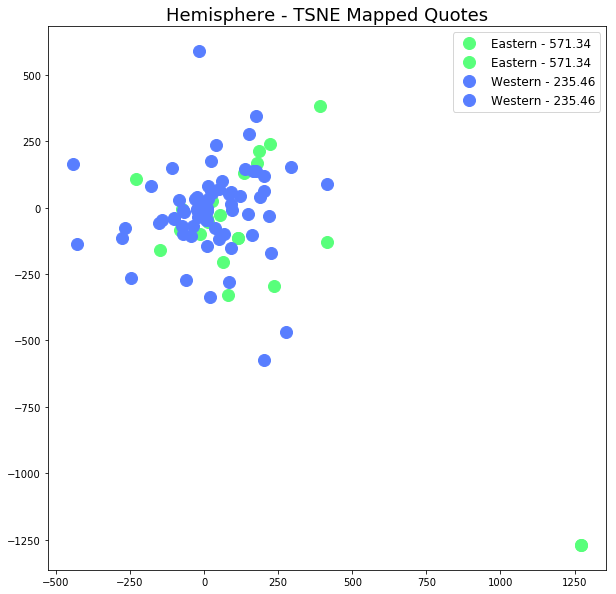

In [ ]:
# Plot TSNE Embeddings by Hemisphere -- Greater Variance

# Viz Params
#plt.style.use('dark_background') #dark mode
plt.style.use('seaborn-pastel') #light mode

plt.figure(figsize=(10, 10), dpi=None) #size & DPI-(can specify w int)
plt.title("{} - TSNE Mapped Quotes".format("Hemisphere"), fontsize=18) #old-school AuthorName in Title str formatting

plt.plot(X_east, y_east, ".", color="#58FF7B", label='Eastern - {:.2f}'.format((np.std(X_east) + np.std(y_east)/2)), markersize=24)
plt.plot(X_west, y_west, ".", color="#587EFF", label='Western - {:.2f}'.format((np.std(X_west) + np.std(y_west)/2)), markersize=24)
# legend value is average deviation from local cluster
plt.legend(loc="best", fontsize=12)


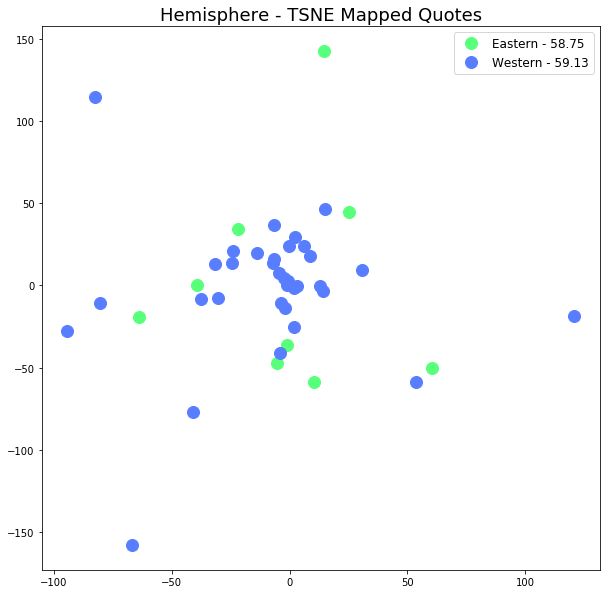

In [ ]:
# Plot TSNE Embeddings by Hemisphere

# Viz Params
#plt.style.use('dark_background') #dark mode
plt.style.use('seaborn-pastel') #light mode

plt.figure(figsize=(10, 10), dpi=None) #size & DPI-(can specify w int)
plt.title("{} - TSNE Mapped Quotes".format("Hemisphere"), fontsize=18) #old-school AuthorName in Title str formatting

plt.plot(X_east, y_east, ".", color="#58FF7B", label='Eastern - {:.2f}'.format((np.std(X_east) + np.std(y_east)/2)), markersize=24)
plt.plot(X_west, y_west, ".", color="#587EFF", label='Western - {:.2f}'.format((np.std(X_west) + np.std(y_west)/2)), markersize=24)
# legend value is average deviation from local cluster
plt.legend(loc="best", fontsize=12)


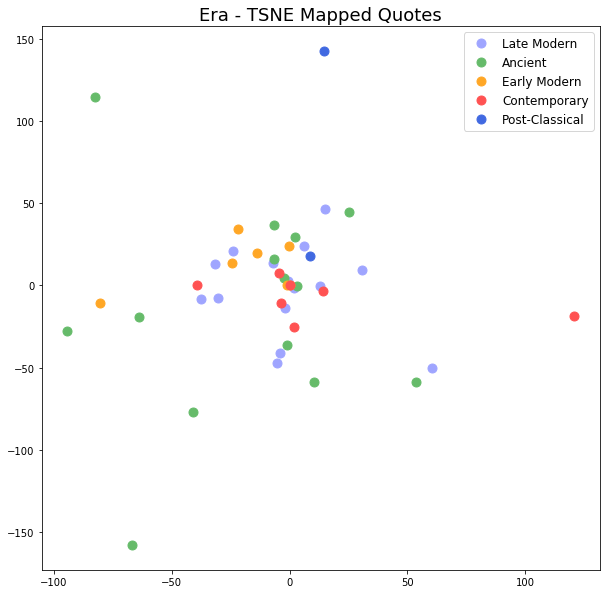

In [ ]:
# Plot TSNE Embeddings by Era

# Viz Params
#plt.style.use('dark_background') #dark mode
plt.style.use('seaborn-pastel') #light mode

plt.figure(figsize=(10, 10), dpi=None) #size & DPI-(can specify w int)
plt.title("{} - TSNE Mapped Quotes".format("Era"), fontsize=18) #old-school AuthorName in Title str formatting


plt.plot(X_lm, y_lm, ".", color="#9FA5FF", label='Late Modern', markersize=18)
plt.plot(X_a, y_a, ".", color="#66BB6A", label='Ancient', markersize=18)
plt.plot(X_en, y_en, ".", color="#FFA726", label='Early Modern', markersize=18)
plt.plot(X_c, y_c, ".", color="#FF5252", label='Contemporary', markersize=18)
plt.plot(X_pc, y_pc, ".", color="royalblue", label='Post-Classical', markersize=18)


# plt.plot(X_avg, y_avg, ".", color="royalblue", label='Average')
# plt.plot(X_avg1, y_avg1, ".", color="gold", label='Average')


plt.legend(loc="best", fontsize=12)
#plt.legend("Sun Lao".format(), loc="best")